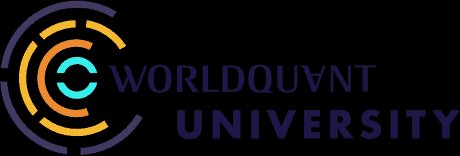

# <center> MSCFE 690 CAPSTONE (C18-S3) </center> 

## <strong> <center> HIGH FREQUENCY TRADING </center> </strong>

<strong> <center> FINAL PROJECT REPORT </center> </strong>



<strong> Group One Members: </strong>

Yvonne Mukiibi – yvonneagatha@gmail.com

Mramba Nkalangango – mrambagsn@yahoo.com

Peter Kwagala–kwagalapeter@yahoo.com 

<b>Questions to address:</b>

* Perform Expolatory Data Analysis (EDA) to understand the financial data to be analysed.

* Perform Feature Engeneering (extration) from raw data via data mining techniques.

* Predicting 5 days future percentage return using different machine learning modelling algorithms.

<b>Tools To Be Used :</b>

* Create Moving Averages (MA) and Relative Strength Index (RSI) indicators.

* Dummy coding (coding a categorical variable) into dichotomous variables for "day of the week".

* LinearRegressor, RandomForestRegressor, GradientBoostingRegressor and K-Nearest Neighboors (KNN) Algorithms.

* Feature importance - subset of relevant features (variables, predictors) for use in model construction.

* Neural Networks (layers of interconnected nodes) with custom loss function, dropout and ensembling.

# A: Exploratory data analysis (EDA)

<b>Loading all required modules for the project</b>

Modules installed through python pip install method: https://packaging.python.org/tutorials/installing-packages/

In [1]:
import pandas as pd
from IPython.display import display, Math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
import requests 

%matplotlib inline
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
import matplotlib.dates as mdates
from datetime import datetime

plt.style.use('seaborn')
plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green', '#9E80BA', '#8EDB8E', '#58517A']
Ncolors = 10
color_map = plt.cm.Blues_r(np.linspace(0.2, 0.5, Ncolors))
#color_map = plt.cm.tab20c_r(np.linspace(0.2, 0.5, Ncolors))

from pandas_datareader import data as pdr
import yfinance as yf

import tensorflow as tf
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.losses

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
import statsmodels.api as sm

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


<b> Get Data: </b>

Data set comes from yahoo finance website: https://finance.yahoo.com/

In [2]:
# Dataframe preparation for Apple Plc (AAPL)
df = pd.read_csv('AAPL.csv')
# Convert the index of the DataFrame to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index(['Date'],inplace=True)
AAPL_df = df[['Adj_Close','Adj_Volume']].loc['2015-01-01':]
display(AAPL_df[:3])

# Dataframe preparation for Microsoft Plc (MSFT)
df = pd.read_csv('MSFT.csv')
# Convert the index of the DataFrame to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index(['Date'],inplace=True)
MSFT_df = df[['Adj_Close','Adj_Volume']].loc['2015-01-01':]
display(MSFT_df[:3])

,Adj_Close,Adj_Volume
Date,,
2015-01-02,99.945885,53204600
2015-01-05,97.130241,64285500
2015-01-06,97.139420,65797100


,Adj_Close,Adj_Volume
Date,,
2015-01-02,41.748566,27913900
2015-01-05,41.364658,39673900
2015-01-06,40.757530,36447900


count    1257.000000
mean      148.577996
std        45.647899
min        84.962914
25%       107.770096
50%       145.002686
75%       181.478729
max       290.044617
Name: Adj_Close, dtype: float64


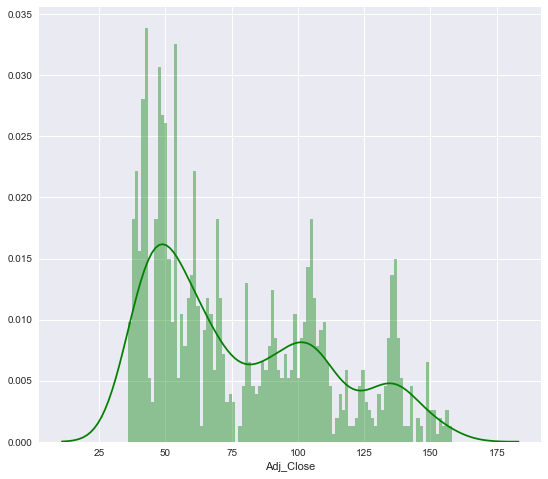

In [3]:
# AAPL Data count, mean, standard deviation, minimum and maximum values and the quantiles of the data
print(AAPL_df['Adj_Close'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Adj_Close'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    1257.000000
mean       77.815822
std        32.955093
min        36.070190
25%        49.240849
50%        67.570671
75%       103.911064
max       158.086731
Name: Adj_Close, dtype: float64


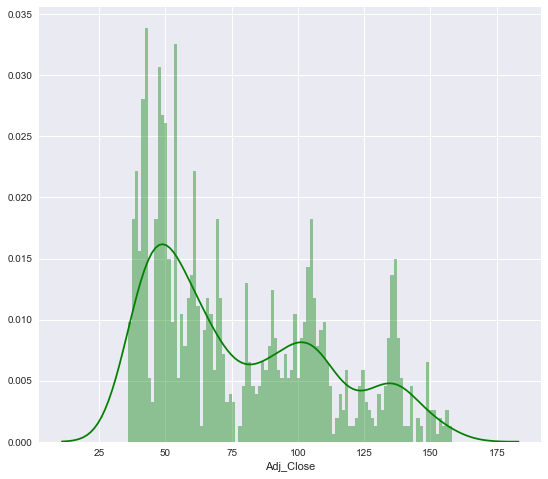

In [4]:
# MSFT Data count, mean, standard deviation, minimum and maximum values and the quantiles of the data
print(MSFT_df['Adj_Close'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Adj_Close'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [5]:
# Getting the feeling of the MSFT data by sampling
MSFT_df['Adj_Close'].sample(5)

Date
2019-02-14    104.763680
2015-05-29     42.409435
2017-10-11     73.250496
2015-03-02     39.456039
2019-06-24    136.105179
Name: Adj_Close, dtype: float64

In [6]:
# Getting the feeling of the AAPL data by sampling
AAPL_df['Adj_Close'].sample(5)

Date
2016-02-19     89.777054
2015-08-28    104.881653
2015-12-15    102.727333
2019-07-18    203.234497
2019-05-31    173.005280
Name: Adj_Close, dtype: float64

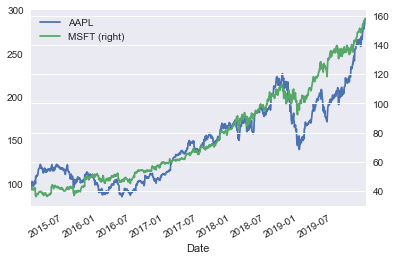

In [7]:
AAPL_df['Adj_Close'].plot(label='AAPL', legend=True)
MSFT_df['Adj_Close'].plot(label='MSFT', legend=True, secondary_y=True)
# Plotting AAPL & MSFT Adjusted Close Price on one plot
plt.show()  

Histogram of the daily price change, in percentage, for AAPL

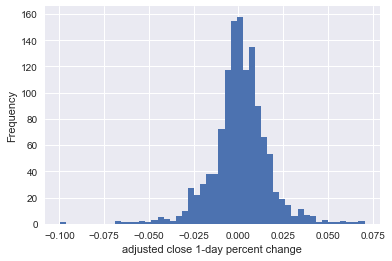

In [8]:
AAPL_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000             0.046422
5d_close_future_pct      0.046422             1.000000


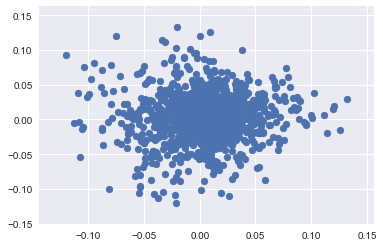

In [9]:
#Creating Apple (AAPL) data for 5 days in the future
AAPL_df['5d_future_close'] = AAPL_df['Adj_Close'].shift(-5)

# Creating 5-day percentage changes of Adj_Close for the current day, and 5 days in the future
AAPL_df['5d_close_future_pct'] = AAPL_df['5d_future_close'].pct_change(5)
AAPL_df['5d_close_pct'] = AAPL_df['Adj_Close'].pct_change(5)

# Compute the correlation matrix between the 5d close pecentage changes, i.e current day  and future
corr = AAPL_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Plotting Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(AAPL_df['5d_close_pct'], AAPL_df['5d_close_future_pct'])
plt.show()

<b>Correlation Coefficient:</b>

Correlations are never lower than -1. A correlation of -1 indicates that the data points in a scatter plot lie exactly on a straight descending line; the two variables are perfectly negatively linearly related.

A correlation of 0 means that two variables don't have any linear relation whatsoever. However, some non linear relation may exist between the two variables.

Correlation coefficients are never higher than 1. A correlation coefficient of 1 means that two variables are perfectly positively linearly related; the dots in a scatter plot lie exactly on a straight ascending line.

There is some positive correlation between current value and 10 days in future. its is approximately 0.1 to 3 signifance digits
</p>

In [10]:
# creating a list of the feature names for later days.
feature_names = ['5d_close_pct']  

# Obtain the difference in price from previous step
delta = AAPL_df['Adj_Close'].diff()

# Getting rid of the first row, which is NaN since it did not have a previous data.
delta = delta[1:] 

# Create the positive gains (up) and negative gains (down) data series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# Create moving averages (MA) and Relative Strength Index (RSI) for timeperiods of 14, 30, 50, and 200 days.
for n in [14,30,50,200]:

    # Create the moving average (MA) indicator and divide by Adj_Close
    AAPL_df['ma' + str(n)] = AAPL_df['Adj_Close'].rolling(window=n, center=False).mean().shift(0)/ AAPL_df['Adj_Close']
    
    # Create the Relative Strength Index (RSI) indicator
    window_length=n
   
    # Calculate the Simple Moving Average (SMA)
    roll_up2 = up.rolling(window=n, center=False).mean().shift(0)
    roll_down2 = down.abs().rolling(window=n, center=False).mean().shift(0)

    # Calculate the Relative Strength Index (RSI) indicator based  on Simple Moving Average (SMA)
    RS2 = roll_up2 / roll_down2
    RSI2 = 100.0 - (100.0 / (1.0 + RS2))

    # Creating the RSI indicator
    AAPL_df['rsi' + str(n)] = RSI2
      
    
    # Add RSI and moving average (MA) to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


# B: Feature Engineering: 

The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100.

A moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.

<b> Create feature matrix </b>

Volume features, 1-day % change and 5-day SMA of the % change

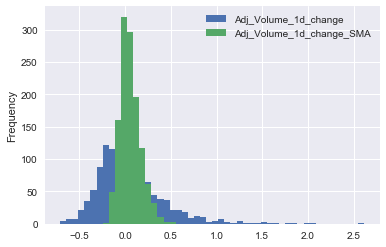

In [11]:
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
#Calculate 1-day % change
AAPL_df['Adj_Volume_1d_change'] = AAPL_df['Adj_Volume'].pct_change()
# Calculate moving averge
AAPL_df['Adj_Volume_1d_change_SMA'] = AAPL_df['Adj_Volume_1d_change'].rolling(window=5, center=False).mean().shift(0)

# Plotting histogram of volume % change data
AAPL_df[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

<b>Dummy variable (Indicator variable) day of the week</b>

In [12]:
days_of_week = pd.get_dummies(AAPL_df.index.dayofweek, prefix='weekday', drop_first=True)

# Setting the index as the original dataframe index for merging
days_of_week.index = AAPL_df.index

# combining  the dataframe with the days of week dataframe
AAPL_df = pd.concat([AAPL_df, days_of_week], axis=1)

# Adding days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
AAPL_df.dropna(inplace=True)  # drop missing values in-place

In [13]:
display(AAPL_df.iloc[:3,-9:])

,rsi50,ma200,rsi200,Adj_Volume_1d_change,Adj_Volume_1d_change_SMA,weekday_1,weekday_2,weekday_3,weekday_4
Date,,,,,,,,,
2015-10-19,47.914153,1.079944,50.633051,-0.241468,0.015463,0,0,0,0
2015-10-20,46.645621,1.060969,51.490981,0.645468,0.127606,1,0,0,0
2015-10-21,50.163697,1.061450,51.487629,-0.146476,0.029244,0,1,0,0


<b> Dataframe created from feature and targets.</b>

In [14]:
# NA values removal
AAPL_df = AAPL_df.dropna()

# Creating features and targets
features = AAPL_df[feature_names]
targets = AAPL_df['5d_close_future_pct']

# Creating DataFrame from target column and feature columns
feat_targ_df = AAPL_df[['5d_close_future_pct'] + feature_names]

<b> Features quality check with corr() function and Heat map </b>

5d_close_future_pct         1.000000
5d_close_pct                0.074055
ma14                       -0.084473
rsi14                       0.079575
ma30                       -0.087112
rsi30                       0.031537
ma50                       -0.063059
rsi50                       0.016489
ma200                      -0.000930
rsi200                      0.021362
Adj_Volume_1d_change       -0.002499
Adj_Volume_1d_change_SMA   -0.007806
weekday_1                   0.002396
weekday_2                  -0.016511
weekday_3                   0.009378
weekday_4                   0.005501
Name: 5d_close_future_pct, dtype: float64


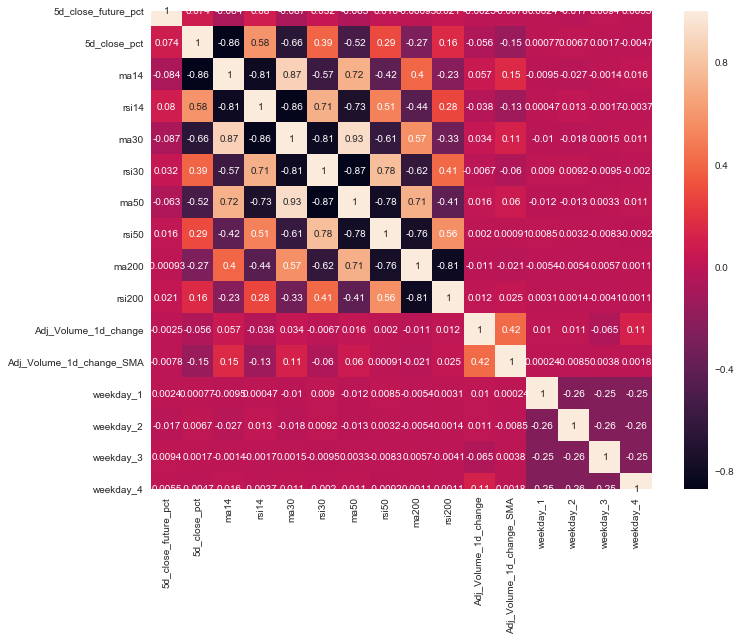

In [15]:
corr = feat_targ_df.corr()
print(corr['5d_close_future_pct'])

fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, annot=True)
# fix ticklabel directions
plt.yticks(rotation=0); plt.xticks(rotation=90)

# tightly fits plot area to the plot
plt.tight_layout() 

# show the plot
plt.show()  

<b> Some features are weak but when combined could give out additional information.</b>

# C: Predicting 5 days future percentage return.

<b> Train and Test samples</b>

In [16]:
train_size = int(0.85 * features.shape[0])
train_features = features[:train_size]
train_targets = targets[:train_size]
test_features = features[train_size:]
test_targets = targets[train_size:]

#print(f"full sample size: {linear_features.shape[0]}")
print(f"train size: {train_features.shape[0]}")
print(f"test size: {test_features.shape[0]}")

train size: 894
test size: 158


<b>3 - Linear Model</b>

In [17]:
# Adding a constant to the features
import statsmodels.api as sm
linear_features = sm.add_constant(features)
linear_train_features = linear_features[:train_size]
linear_test_features = linear_features[train_size:]

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
# Creating the linear model and complete the least squares fit
model = sm.OLS(train_targets, linear_train_features)
# model fitting
results = model.fit()  
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.039
Model:                             OLS   Adj. R-squared:                  0.022
Method:                  Least Squares   F-statistic:                     2.346
Date:                 Mon, 01 Jun 2020   Prob (F-statistic):            0.00266
Time:                         13:09:51   Log-Likelihood:                 1759.1
No. Observations:                  894   AIC:                            -3486.
Df Residuals:                      878   BIC:                            -3409.
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

<b> P Values:</b>

<b>Features with p <= 0.05 are considered significant. The significant features are rsi30, MA200 and rsi200</b>

In [19]:
print(results.pvalues[results.pvalues.values<0.05])

rsi30     0.022703
ma200     0.000015
rsi200    0.000477
dtype: float64


The significant features are rsi30, ma200 and rsi200 are significant since they have p <= 0.05.

<b> Predictions vs the targets </b>

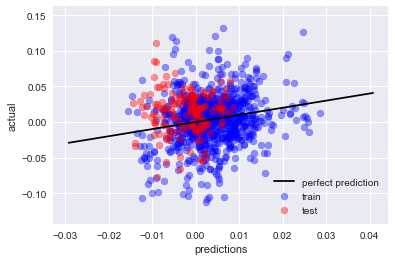

In [20]:
# Traing and Test predictions
train_predictions = results.predict(linear_train_features)
test_predictions = results.predict(linear_test_features)
plt.scatter(train_predictions, train_targets, alpha=0.4, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.4, color='r', label='test')

# Plotting the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect prediction')

# Setting the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
# show the legend
plt.legend()
# Display the plot
plt.show()

<b> 4 - RandomForestRegressor with ParameterGrid hyperparameter search</b>

In [21]:
#grid of hyperparameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
grid = {'n_estimators':[200], 'max_depth': [3, 5, 10], 'max_features': [4,8,15], 'random_state': [42]}
test_scores = []

rfr = RandomForestRegressor()
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    #default scoring is R^2
    test_scores.append(rfr.score(test_features, test_targets))

# Finding the best hyperparameters from the test score
best_idx = np.argmax(test_scores)
# Print the best hyperparameters from the test score
print(f"R^2: {test_scores[best_idx]:0.3f}\n", ParameterGrid(grid)[best_idx])

R^2: -0.094
 {'random_state': 42, 'n_estimators': 200, 'max_features': 15, 'max_depth': 3}


<b> Predictions and plot predictions vs the targets (Best random forest model)</b>

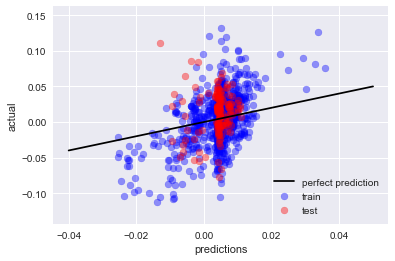

In [22]:
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_predictions, train_targets, alpha=0.4, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.4, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect prediction')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()

<b> feature importance </b>

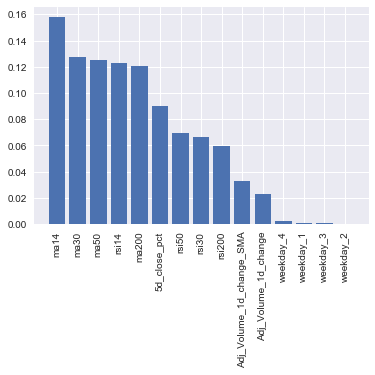

In [23]:
importances = rfr.feature_importances_

#sort importances then reverse
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)
plt.xticks(rotation=90)
plt.show()

<b> 5 - Gradient Boosting Regressor </b>

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features, train_targets)

print(f"Train R^2: {gbr.score(train_features, train_targets):0.3f}")
print(f"Test R^2: {gbr.score(test_features, test_targets):0.3f}")

Train R^2: 0.239
Test R^2: -0.135


<b> Feature importance</b>

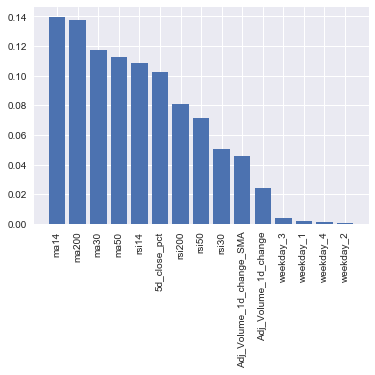

In [25]:
feature_importances = gbr.feature_importances_
sorted_index = np.argsort(feature_importances)[::-1]
x = range(features.shape[1])

labels = np.array(feature_names)[sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)
plt.xticks(rotation=90)
plt.show()

<b> 6 - Standardize data</b>

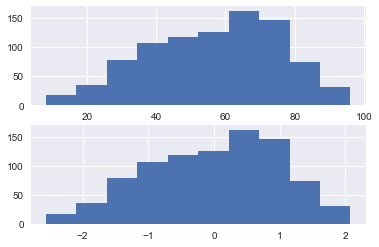

In [26]:
# Removing unimportant features (weekdays)
from sklearn.preprocessing import scale
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

# Standardizing the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plotting histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

<b>7 - KNN Regressor</b>

In [27]:
from sklearn.neighbors import KNeighborsRegressor
for n in range(2,13,2):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fitting the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)    
    train_score = knn.score(scaled_train_features, train_targets)
    test_score = knn.score(scaled_test_features, test_targets)
    print(f'train / test scores: {train_score:0.4f} / {test_score:0.4f}')    
    # prints a blank line
    print()  

n_neighbors = 2
train / test scores: 0.6835 / -0.8520

n_neighbors = 4
train / test scores: 0.4491 / -0.6441

n_neighbors = 6
train / test scores: 0.3588 / -0.4771

n_neighbors = 8
train / test scores: 0.2877 / -0.4147

n_neighbors = 10
train / test scores: 0.2467 / -0.4420

n_neighbors = 12
train / test scores: 0.2053 / -0.4408



<b> Predictions and Plot (predictions vs the targets)</b>

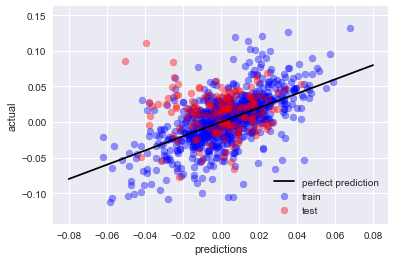

In [28]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(scaled_train_features, train_targets)

# Predictions for train and test datasets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)


plt.scatter(train_predictions, train_targets, alpha=0.4, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.4, color='r', label='test')

# Plotting the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect prediction')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()

<b> 8 - Neural Nets (NN) </b>

<b> creating and fit NN</b>

In [29]:
from keras.models import Sequential
# Creating the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fitting the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=100, verbose=0)

print('model fit completed')

model fit completed


<b>examining loss</b>

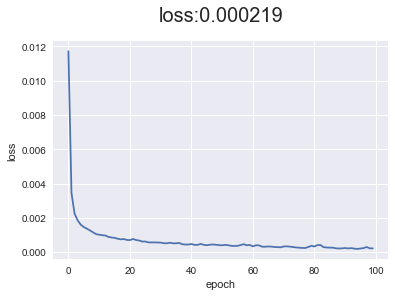

In [30]:
loss = history.history['loss']
plt.plot(np.array(loss))
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

<b> Performance Evaluation of model_1</b>

R^2 train 0.804
R^2 test -1.602


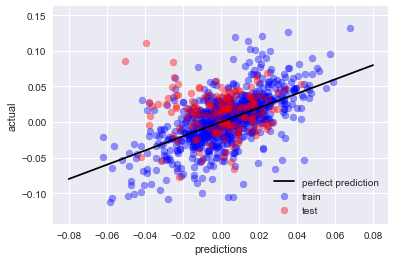

In [31]:
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(f"R^2 train {r2_score(train_targets, train_preds):0.3f}")
print(f"R^2 test {r2_score(test_targets, test_preds):0.3f}")

plt.scatter(train_predictions, train_targets, alpha=0.4, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.4, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect prediction')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()

<b> 9 - Neural Net with Custom Loss function using keras </b>

<b> Loss function and activate with keras </b>

In [32]:
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1) # train on last axis, the one our NN was just trained on

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x00000278DD49B4C8>


<b>training the model</b>

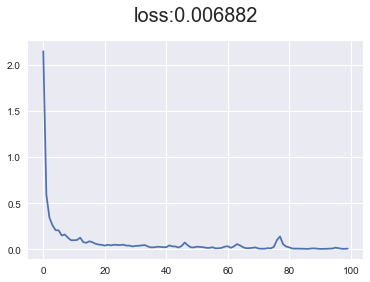

In [33]:
from keras.models import Sequential
# Creating the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fitting the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=100, verbose=0)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

<b> Performance Evaluation of Model_2</b>

R^2 train 0.283
R^2 test -3.485


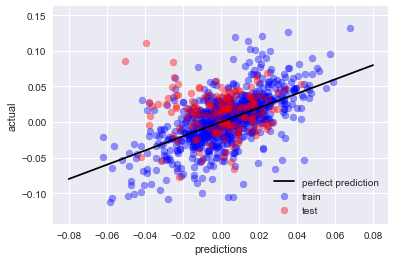

In [34]:
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(f"R^2 train {r2_score(train_targets, train_preds):0.3f}")
print(f"R^2 test {r2_score(test_targets, test_preds):0.3f}")

plt.scatter(train_predictions, train_targets, alpha=0.4, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.4, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect prediction')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()

<b> 10 - Combat NN overfiting with dropout</b>

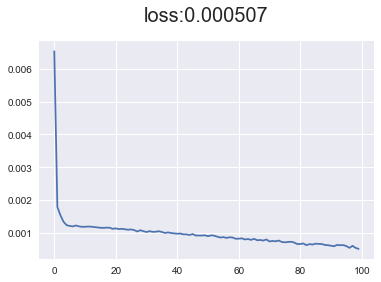

In [35]:
# Creating model with dropout
model_3 = Sequential()
model_3.add(Dense(500, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.4))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fitting model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=100, verbose=0)

#Plotting loss graph
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

<b>Performance Evaluation of model_3</b>

R^2 train 0.283
R^2 test -0.754


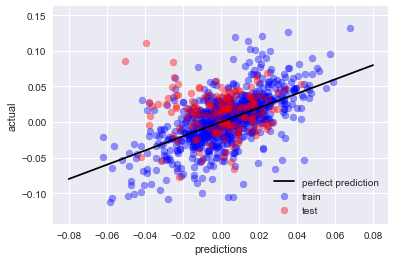

In [36]:
test_preds = model_3.predict(scaled_test_features)
print(f"R^2 train {r2_score(train_targets, train_preds):0.3f}")
print(f"R^2 test {r2_score(test_targets, test_preds):0.3f}")

plt.scatter(train_predictions, train_targets, alpha=0.4, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.4, color='r', label='test')

# Plotting the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect prediction')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()

<b> 11 - Combat NN overfiting with Ensembling (averaging the 3 models)</b>

In [37]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1, test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[-0.04360201 -0.04986292 -0.03501145 -0.02530745  0.01797708]


<b>Performance Evaluation of Ensembling (averaging the models)</b>

R^2 train 0.759
R^2 test -1.311


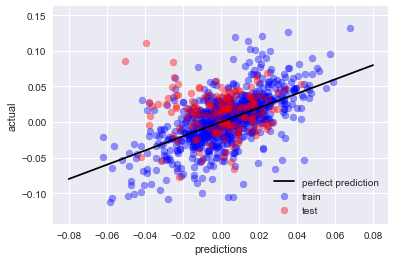

In [38]:
from sklearn.metrics import r2_score
print(f"R^2 train {r2_score(train_targets, train_preds):0.3f}")
print(f"R^2 test {r2_score(test_targets, test_preds):0.3f}")

plt.scatter(train_predictions, train_targets, alpha=0.4, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.4, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k', label='perfect prediction')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()

<a id='tradingstrategy'></a>
## Building A Trading Strategy

In [39]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=AAPL_df.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = AAPL_df['Adj_Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = AAPL_df['Adj_Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg   long_mavg  positions
Date                                                 
2015-10-19     0.0  103.437447  103.437447        NaN
2015-10-20     0.0  104.381737  104.381737        0.0
2015-10-21     0.0  104.693418  104.693418        0.0
2015-10-22     0.0  105.251970  105.251970        0.0
2015-10-23     0.0  106.249959  106.249959        0.0
...            ...         ...         ...        ...
2019-12-16     1.0  258.515112  231.506799        0.0
2019-12-17     1.0  259.525471  232.243808        0.0
2019-12-18     1.0  260.532803  232.954979        0.0
2019-12-19     1.0  261.467247  233.677831        0.0
2019-12-20     1.0  262.377346  234.352813        0.0

[1052 rows x 4 columns]


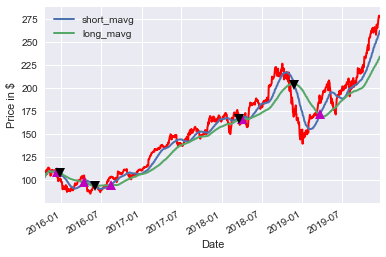

In [40]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
AAPL_df['Adj_Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

<a id='backtesting'></a>
## Backtesting A Strategy

### Implementation Of A Simple Backtester 

In [41]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL_df'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(AAPL_df['Adj_Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(AAPL_df['Adj_Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(AAPL_df['Adj_Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

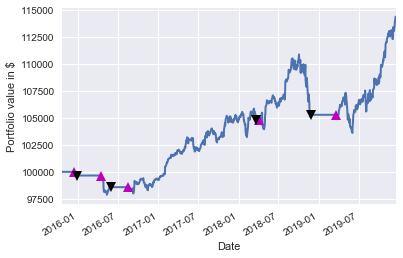

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

<a id='evaluating'></a>
## Evaluating Moving Average Crossover Strategy 

### Sharpe Ratio

In [43]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

1.005472051258785


### Maximum Drawdown

Maximum max_daily_drawdown: -0.3851591350700595


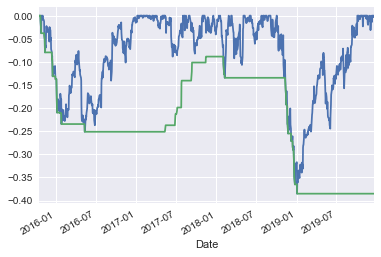

In [44]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = AAPL_df['Adj_Close'].rolling(window, min_periods=1).max()
daily_drawdown = AAPL_df['Adj_Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()
print("Maximum max_daily_drawdown:", min(max_daily_drawdown))

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Compound Annual Growth Rate (CAGR)

In [45]:
# Get the number of days in `aapl`
days = (AAPL_df.index[-1] - AAPL_df.index[0]).days

# Calculate the CAGR 
cagr = ((((AAPL_df['Adj_Close'][-1]) / AAPL_df['Adj_Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.26190862550607874


# <u> Results Interpretation and Conclusion </u>

### Correlation Coefficient:

* Correlations are never lower than -1. A correlation of -1 indicates that the data points in a scatter plot lie exactly on a straight descending line; the two variables are perfectly negatively linearly related.

* A correlation of 0 means that two variables don't have any linear relation whatsoever. However, some non linear relation may exist between the two variables.

* Correlation coefficients are never higher than 1. A correlation coefficient of 1 means that two variables are perfectly positively linearly related; the dots in a scatter plot lie exactly on a straight ascending line.

* There is some positive correlation between  past 5 days  and 5 days in future. Correlation of 0.046422  its is approximately 0.1 to 3 signifance digits.


* Heatmap showing the relationship of various Features or technical indicators for the model.
Features with p <= 0.05 are considered significant. The significant features identified  are rsi30, MA200 and rsi200.

### Models Performance:

As seen on the model evaluation above. The Ensemble Three (3) models is the best with R-Squared of 0.750, that is 75% of the data fit the ensemble (combined) model. Generally, a higher r-squared indicates a better fit for the model.
Ensemble methods helps improve machine learning results by combining multiple models. Using ensemble methods allows to produce better predictions compared to a single model.Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.


### Trading Strategy
 
A trading strategy developed using Simple Moving Average (SMA). The strategy could create trading signals (1) as expected.

 
Applying two moving averages to a chart: one longer and one shorter. When the shorter-term MA crosses above the longer-term MA, it's a buy signal, as it indicates that the trend is shifting up. This is known as a "golden cross."

### Portfolio Value:
 
From the figure above it shows that the strategy has been profitable since January 2016 to December 2019 but before that it was not profitable.  This is confirmed by Compound Annual Growth Rate (CAGR) of 0.26190862550607874 (26.2%) produced by the strategy.


### Maximum Daily Drawdown
 
The figure shows average and acceptable maximum of daily drawdown of  38.5% which is fair, though could be improved.
